In [1]:
import numpy as np
import math 
import matplotlib.pyplot as plt
from scipy import linalg


# Data Preparation

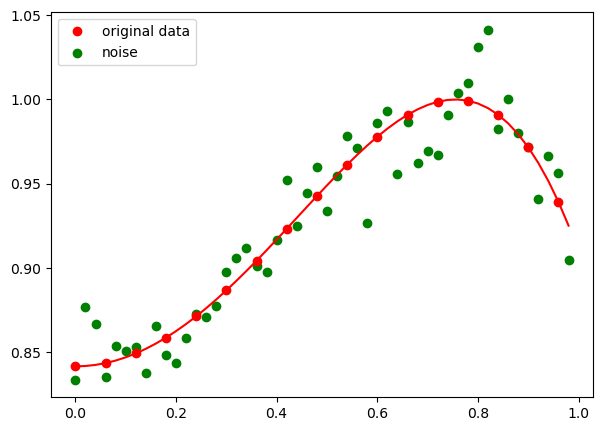

In [2]:
x = np.arange(0,1,0.02)
y = np.sin(x**2 + 1)
sigma = 0.02
noise = np.random.normal(0,sigma,len(x))
y_noise = y+noise
plt.figure(figsize = (7,5))
plt.plot(x,y,'or',markevery = 3,label = 'original data')
plt.plot(x,y,'red')
plt.scatter(x,y_noise,color = 'green',label = 'noise')
plt.legend(loc='best')
#an = np.polyfit(x,y,3)
#yvals = np.polyval(an, x)
#plt.plot(x,yvals,color = 'red')

# Part 1: MAP 

In [23]:
def cal(x,M,alpha):
    beta = 1/(sigma**2)
    t_bar = np.zeros(len(x))
    X = np.zeros((len(x),M+1))
    #X_or = X_or.reshape(len(x),M)
    for i in range(len(x)):
        for j in range(M+1):
            X[i][j] = np.power(x[i],j)
        t_bar[i] = y_noise[i]
    tmp = linalg.inv((alpha/beta)*np.identity(M+1)+np.dot(X.T, X))
    w_bar = np.dot(np.dot(tmp,X.T),t_bar)
    print('w for MAP:\n',w_bar)
    y_map = np.dot(X,w_bar)    
    return y_map

w for MAP:
 [ 8.02507662e-01  7.49901256e-01  3.02527373e+00 -1.31382471e+02
  1.15491466e+03 -5.02148784e+03  1.25730442e+04 -1.89264823e+04
  1.69114666e+04 -8.26862708e+03  1.70491742e+03]

 Absolute error of predicted values and training values:
 [0.00152384 0.00894948 0.00865554 0.00636283 0.00739577 0.02145292
 0.01120347 0.01711188 0.00963945 0.00910239 0.01350689 0.00281265
 0.0141306  0.01068988 0.01201328 0.00604874 0.00096183 0.01141053
 0.00239122 0.02999607 0.02066543 0.01030422 0.01040621 0.0154027
 0.04065552 0.01863759 0.00685744 0.00494315 0.0132616  0.00656639
 0.00895817 0.01745142 0.01842971 0.02136616 0.02211771 0.00194622
 0.00340223 0.00151703 0.00441919 0.02438676 0.00123032 0.02053562
 0.02652771 0.00097496 0.00334434 0.0006023  0.00759811 0.00236613
 0.01400493 0.00636137]


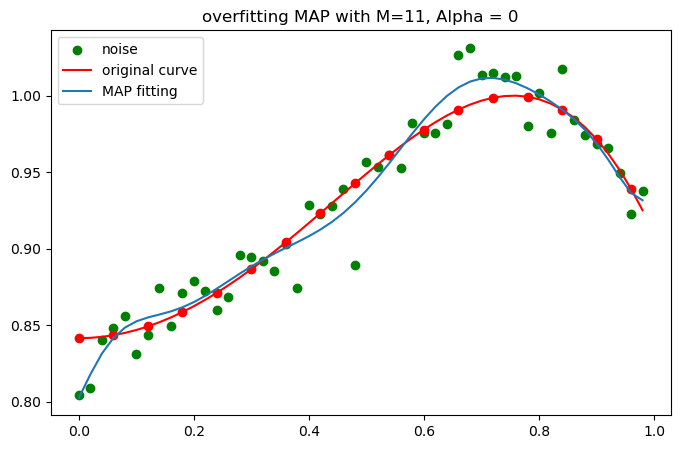

In [50]:
alpha = 0
M = 10
y_map_pred = cal(x,M,alpha)
plt.figure(figsize = (8,5))
plt.plot(x,y,'ro',markevery=3)
plt.scatter(x,y_noise,color = 'green',label = 'noise')
plt.plot(x,y,color = 'red',label = 'original curve')
plt.plot(x,y_map_pred,label = 'MAP fitting')
plt.legend(loc = 'best')
plt.title('overfitting MAP with M=11, Alpha = 0')
print('\n Absolute error of predicted values and training values:\n',np.abs(y_map_pred-y_noise))

w for MAP:
 [ 0.82027449  0.27217833 -0.37019244  0.56014294  0.38599036 -0.07755924
 -0.39369647 -0.47067247 -0.3524895  -0.11333179  0.18168952  0.4863774 ]

 Absolute error of predicted values and training values:
 [0.01624299 0.01668977 0.00947596 0.01257789 0.0157849  0.01335479
 0.00484325 0.0212386  0.00752748 0.0098371  0.01363937 0.0030313
 0.01337132 0.00923709 0.01401435 0.00821358 0.00083798 0.01053766
 0.00185113 0.03226761 0.01657434 0.00456353 0.00343435 0.00782211
 0.04809124 0.01213929 0.00202783 0.00235605 0.01326997 0.00918147
 0.00398595 0.0106801  0.01065055 0.02922228 0.02910004 0.00721678
 0.00636425 0.00191974 0.00241891 0.02822756 0.00355849 0.02520533
 0.0229936  0.0026734  0.00307451 0.00105368 0.00943192 0.00305175
 0.01473452 0.00717758]


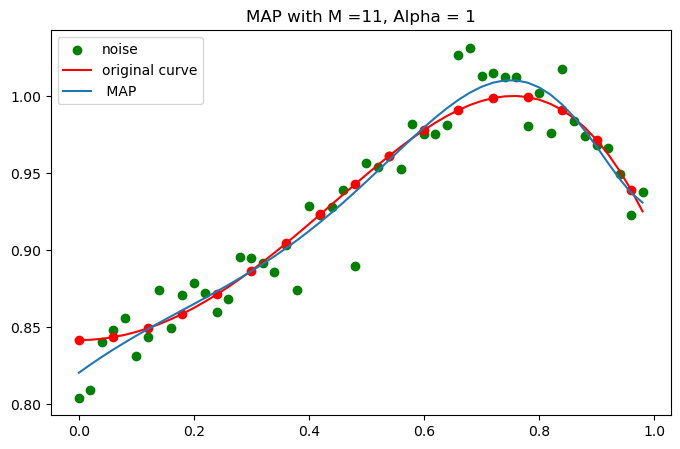

In [49]:
M2 = 11
alpha = 1
y_map_pred = cal(x,M2,alpha)
plt.figure(figsize = (8,5))
plt.plot(x,y,'ro',markevery=3)
plt.scatter(x,y_noise,color = 'green',label = 'noise')
plt.plot(x,y,color = 'red',label = 'original curve')
plt.plot(x,y_map_pred,label = ' MAP')
plt.legend(loc = 'best')
plt.title('MAP with M =%s, Alpha = %s'%(M2,alpha))
print('\n Absolute error of predicted values and training values:\n',np.abs(y_map_pred-y_noise))

# Q7
From the experiment in #7, discuss how M and alpha influence on the fitting accuracy.

Increasing M, the model complexity, will increase the model training performance, that is the model fitting accuracy will rise. 
But if M is too large, it would be an ovrefitting problem, that is during the testing stage the model will perform bad.
In this circumstance, increasing alpha would be a good method to fix overfitting, enabling the model perform best.

# Part 2: BASIS FUNCTION
1-3.data preparation

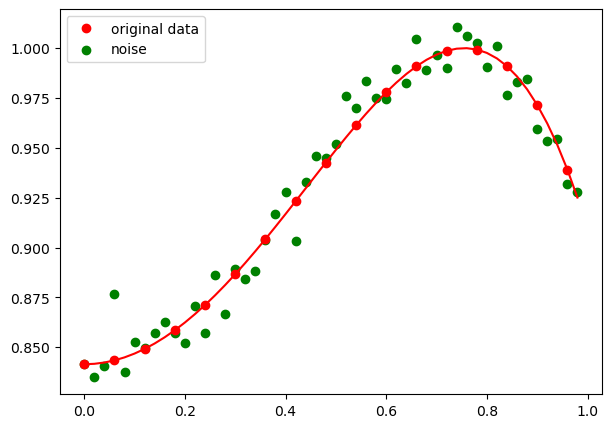

In [6]:
x = np.arange(0,1,0.02)
y = np.sin(x**2 + 1)
sigma = 0.01
noise = np.random.normal(0,sigma,len(x))
y_noise = y+noise
plt.figure(figsize = (7,5))
plt.plot(x,y,'or',markevery = 3,label = 'original data')
plt.plot(x,y,'red')
plt.scatter(x,y_noise,color = 'green',label = 'noise')
plt.legend(loc='best')

3. Gaussian basis on MLE Function

In [7]:
def col_fi(x,u,s,M):
    fik_col = np.exp(-(x-u)**2/2/s**2)
    #print(fik_col)
    return fik_col

def cal_gauMLE(N,M,s,um):
    cap_fi = np.zeros((N,M))
    t_mle = np.zeros((N,1))
    for i in range (N):
        t_mle[i] = y_noise[i]

    for i in range(M):
        #for j in range (M):
        if i ==0:
            cap_fi[:,i] = 1
        else:
            #cap_fi[:,i] = col_fi(x,round(um[i-1],2),s,M)
            cap_fi[:,i] = col_fi(x,um[i-1],s,M)
    w_bar_mle = np.dot(np.dot(linalg.inv(np.dot(cap_fi.T,cap_fi)),cap_fi.T),t_mle)
    y_pred_mle = np.dot(cap_fi,w_bar_mle)
    return y_pred_mle

Text(0.5, 1.0, 'Gaussian MLE overfitting, M = 25')

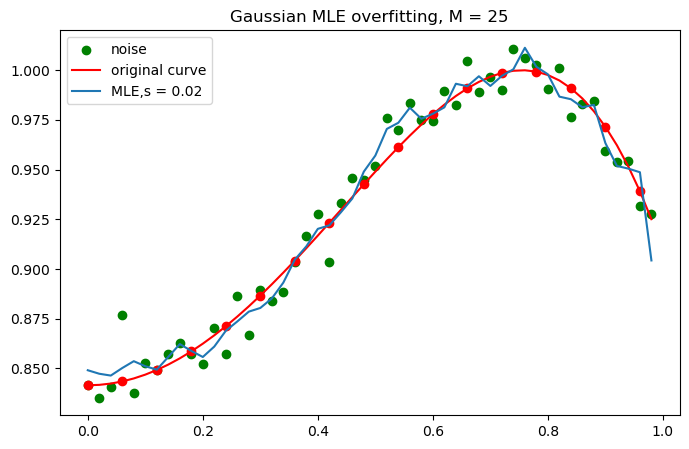

In [8]:
# overfitting
N = len(x)
M =  25# model complexity
um = np.arange(1/M,1,1/M)
s = 0.02
plt.figure(figsize = (8,5))
plt.plot(x,y,'ro',markevery=3)
plt.scatter(x,y_noise,color = 'green',label = 'noise')
plt.plot(x,y,color = 'red',label = 'original curve')
plt.plot(x,cal_gauMLE(N,M,s,um),label = 'MLE,s = %s'%s)
#plt.plot(x,calMLE(x,M2),label = 'MLE overfitting, M = 11')
plt.legend(loc = 'best')
plt.title('Gaussian MLE overfitting, M = %s'%M)

Text(0.5, 1.0, 'Gaussian MLE good fitting, M = 5')

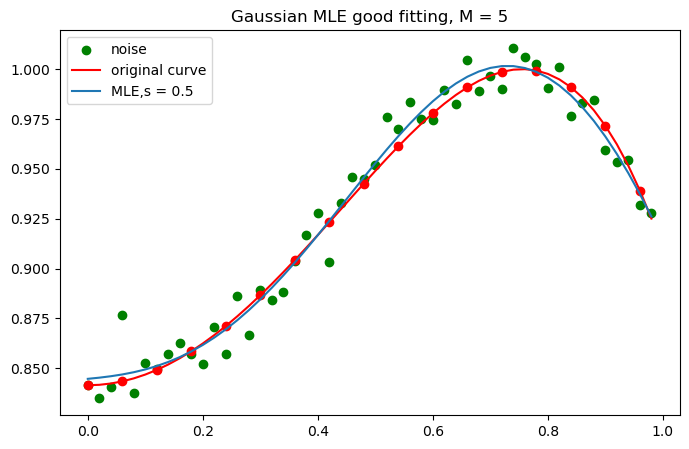

In [9]:
# best fitting
N = len(x)
M =  5# model complexity
um = np.arange(1/M,1,1/M)
s = 0.5
plt.figure(figsize = (8,5))
plt.plot(x,y,'ro',markevery=3)
plt.scatter(x,y_noise,color = 'green',label = 'noise')
plt.plot(x,y,color = 'red',label = 'original curve')
plt.plot(x,cal_gauMLE(N,M,s,um),label = 'MLE,s = %s'%s)
#plt.plot(x,calMLE(x,M2),label = 'MLE overfitting, M = 11')
plt.legend(loc = 'best')
plt.title('Gaussian MLE good fitting, M = %s'%M)

Text(0.5, 1.0, 'Gaussian MLE  underfitting, M = 3')

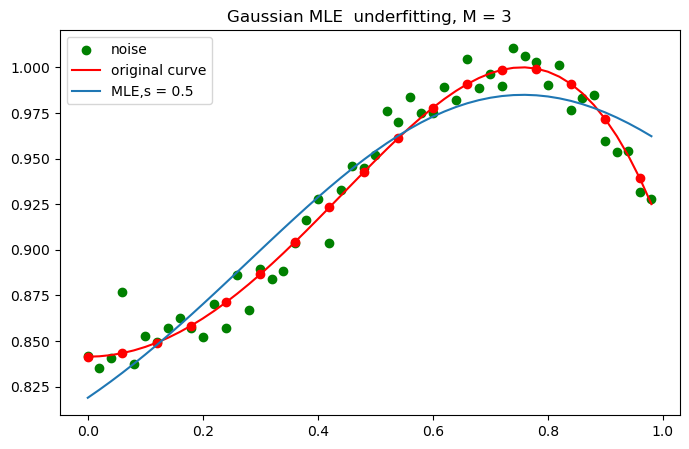

In [10]:
# under fitting
N = len(x)
M =  3# model complexity
um = np.arange(1/M,1,1/M)
#um = np.arange(0,(M-1)/M,1/M)
s = 0.5
plt.figure(figsize = (8,5))
plt.plot(x,y,'ro',markevery=3)
plt.scatter(x,y_noise,color = 'green',label = 'noise')
plt.plot(x,y,color = 'red',label = 'original curve')
plt.plot(x,cal_gauMLE(N,M,s,um),label = 'MLE,s = %s'%s)
#plt.plot(x,calMLE(x,M2),label = 'MLE overfitting, M = 11')
plt.legend(loc = 'best')
plt.title('Gaussian MLE  underfitting, M = %s'%M)

In [11]:
# M=5, S=0.2-0.5 best fitting
#M =10 s = 0.02 overfitting
#M =3,s = 0.5 underfitting

5. Sigmoid basis on MLE function

In [12]:
def fi_sigmoid(x,um,s):
    z = (x-um)/s
    return (1/(1+np.exp(-z)))

def cal_sigMLE(N,M,s,um,ynoise):
    cap_fi = np.zeros((N,M))
    t_mle = np.zeros((N,1))
    for i in range (N):
        t_mle[i] = ynoise[i]

    for i in range(M):
        #for j in range (M):
        if i ==0:
            cap_fi[:,i] = 1
        else:
            #cap_fi[:,i] = col_fi(x,round(um[i-1],2),s,M)
            cap_fi[:,i] = fi_sigmoid(x,um[i-1],s)
    w_bar_mle = np.dot(np.dot(linalg.inv(np.dot(cap_fi.T,cap_fi)),cap_fi.T),t_mle)
    y_pred_mle = np.dot(cap_fi,w_bar_mle)
    return y_pred_mle

Text(0.5, 1.0, 'Sigmoid MLE  underfitting, M = 3')

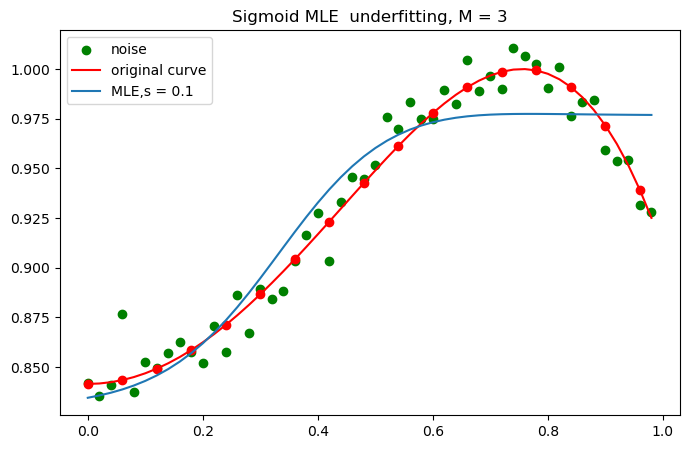

In [13]:
# under fitting
N = len(x)
M =  3# model complexity
um = np.arange(1/M,1,1/M)
#um = np.arange(0,(M-1)/M,1/M)
s = 0.1
plt.figure(figsize = (8,5))
plt.plot(x,y,'ro',markevery=3)
plt.scatter(x,y_noise,color = 'green',label = 'noise')
plt.plot(x,y,color = 'red',label = 'original curve')
plt.plot(x,cal_sigMLE(N,M,s,um,y_noise),label = 'MLE,s = %s'%s)
#plt.plot(x,calMLE(x,M2),label = 'MLE overfitting, M = 11')
plt.legend(loc = 'best')
plt.title('Sigmoid MLE  underfitting, M = %s'%M)

Text(0.5, 1.0, 'Sigmoid MLE best fitting, M = 7')

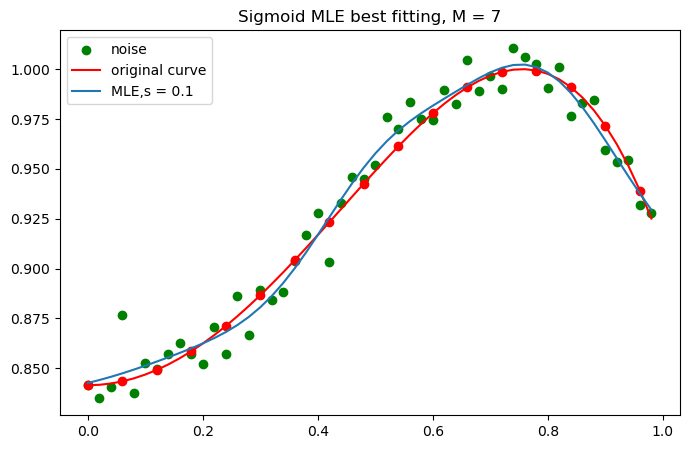

In [14]:
# best fitting
N = len(x)
M =  7# model complexity
um = np.arange(1/M,1,1/M)
#um = np.arange(0,(M-1)/M,1/M)
s = 0.1
plt.figure(figsize = (8,5))
plt.plot(x,y,'ro',markevery=3)
plt.scatter(x,y_noise,color = 'green',label = 'noise')
plt.plot(x,y,color = 'red',label = 'original curve')
plt.plot(x,cal_sigMLE(N,M,s,um,y_noise),label = 'MLE,s = %s'%s)
#plt.plot(x,calMLE(x,M2),label = 'MLE overfitting, M = 11')
plt.legend(loc = 'best')
plt.title('Sigmoid MLE best fitting, M = %s'%M)

Text(0.5, 1.0, 'Sigmoid MLE  overfitting, M = 14')

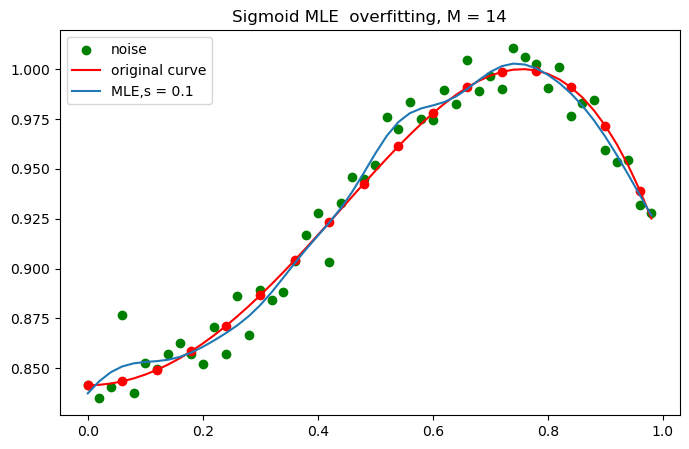

In [15]:
# overfitting 
N = len(x)
M =  14# model complexity
um = np.arange(1/M,1,1/M)
#um = np.arange(0,(M-1)/M,1/M)
s = 0.1
plt.figure(figsize = (8,5))
plt.plot(x,y,'ro',markevery=3)
plt.scatter(x,y_noise,color = 'green',label = 'noise')
plt.plot(x,y,color = 'red',label = 'original curve')
plt.plot(x,cal_sigMLE(N,M,s,um,y_noise),label = 'MLE,s = %s'%s)
#plt.plot(x,calMLE(x,M2),label = 'MLE overfitting, M = 11')
plt.legend(loc = 'best')
plt.title('Sigmoid MLE  overfitting, M = %s'%M)

6. change y to be a polynomial function and use sigmoid for MLE

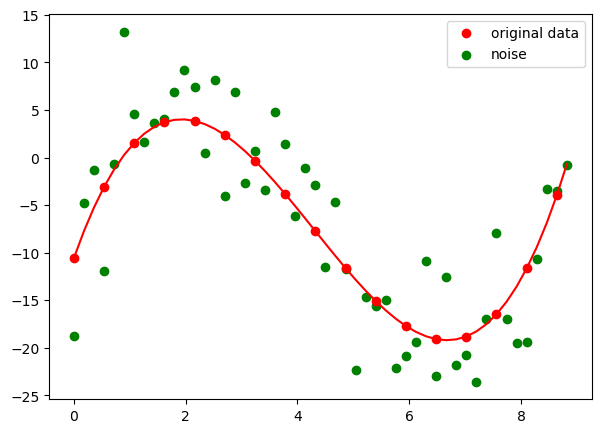

In [51]:
x_poly = np.arange(0,9,0.18)
y_poly = 0.4345*x_poly**3-5.607*x_poly**2+16.78*x_poly-10.61
sigma = 4.5
noise = np.random.normal(0,sigma,len(x_poly))
y_noise_poly = y_poly + noise
plt.figure(figsize = (7,5))
plt.plot(x_poly,y_poly,'or',markevery = 3,label = 'original data')
plt.plot(x_poly,y_poly,'red')
plt.scatter(x_poly,y_noise_poly,color = 'green',label = 'noise')
plt.legend(loc='best')

Text(0.5, 1.0, 'Sigmoid MLE  underfitting, M = 7')

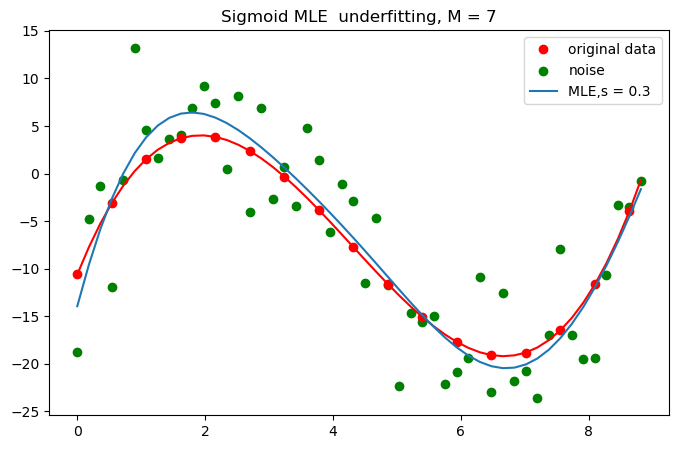

In [56]:
# best fitting
N = len(x)
M =  7# model complexity
um = np.arange(1/M,1,1/M)
#um = np.arange(0,(M-1)/M,1/M)
s = 0.3
plt.figure(figsize = (8,5))
plt.plot(x_poly,y_poly,'or',markevery = 3,label = 'original data')
plt.plot(x_poly,y_poly,'red')
plt.scatter(x_poly,y_noise_poly,color = 'green',label = 'noise')
plt.plot(x_poly,cal_sigMLE(N,M,s,um,y_noise_poly),label = 'MLE,s = %s'%s)
#plt.plot(x,calMLE(x,M2),label = 'MLE overfitting, M = 11')
plt.legend(loc = 'best')
plt.title('Sigmoid MLE  underfitting, M = %s'%M)

7. How different parameters affect the MLE fitting result

small M will result in underfitting porblem, increasing s only do a little bit influence to adjust the problem.

large M will result in overfitting problem, it is important to choose s to adjust this problem because too small s is useless while too large s will be over-adjusting

It is important to choose proper M and s for MLE fitting.


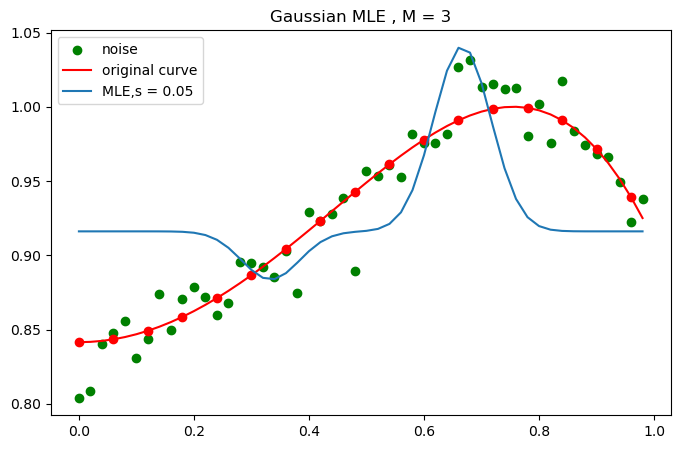

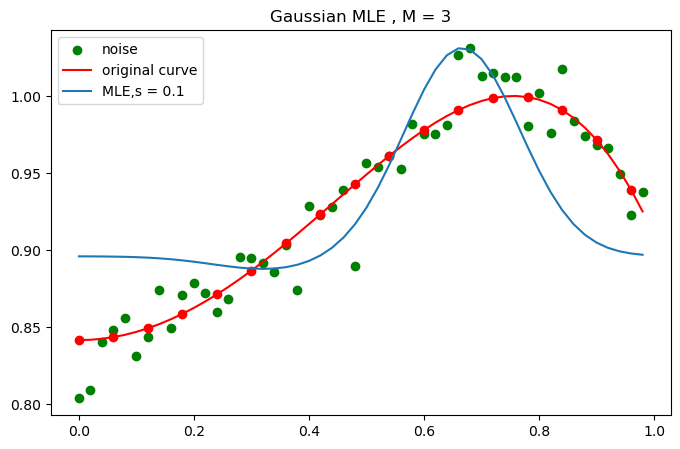

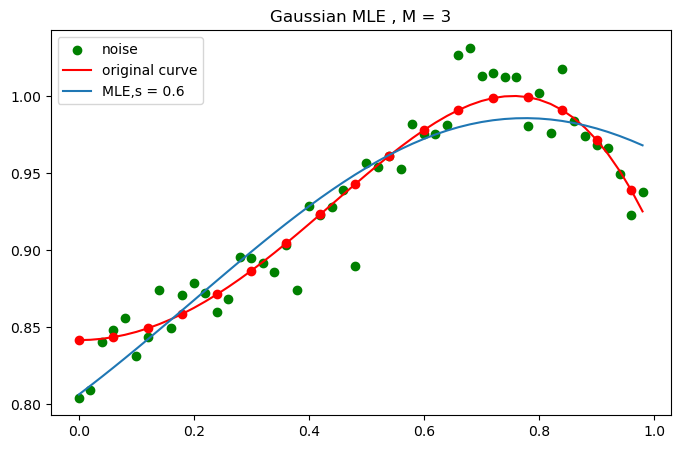

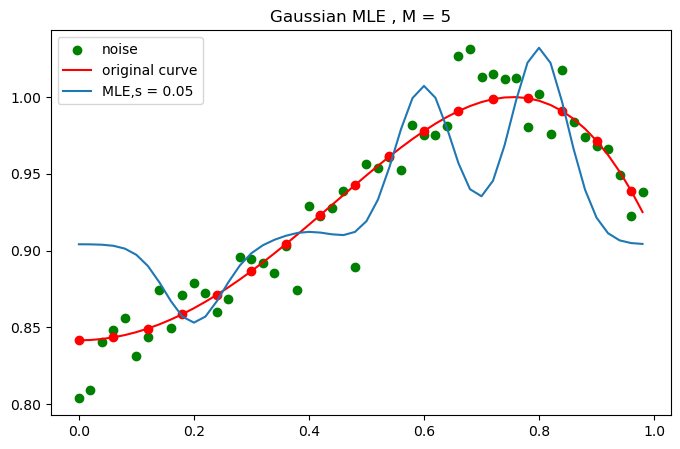

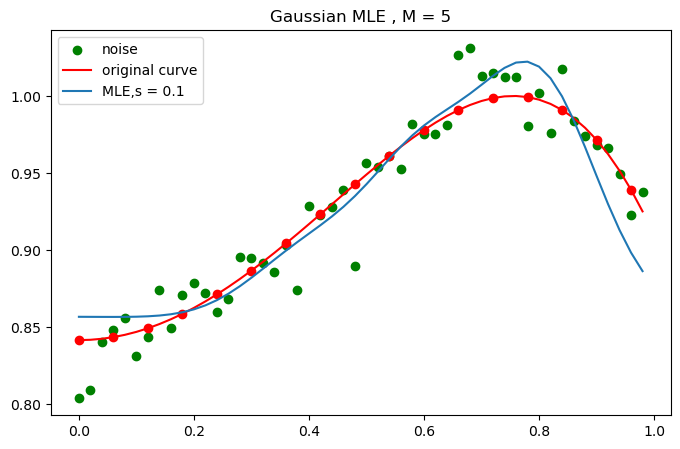

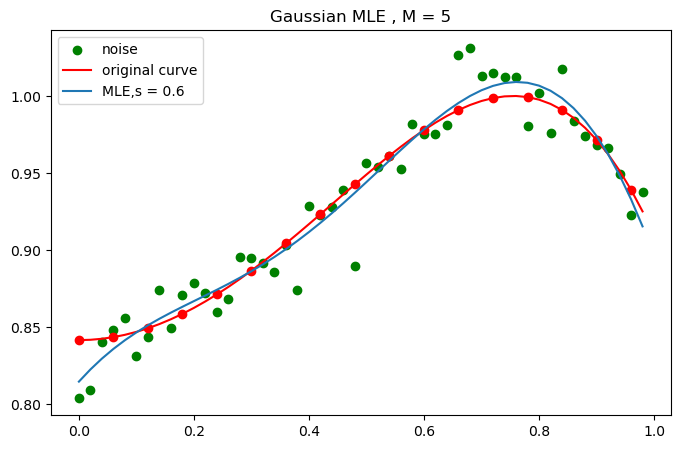

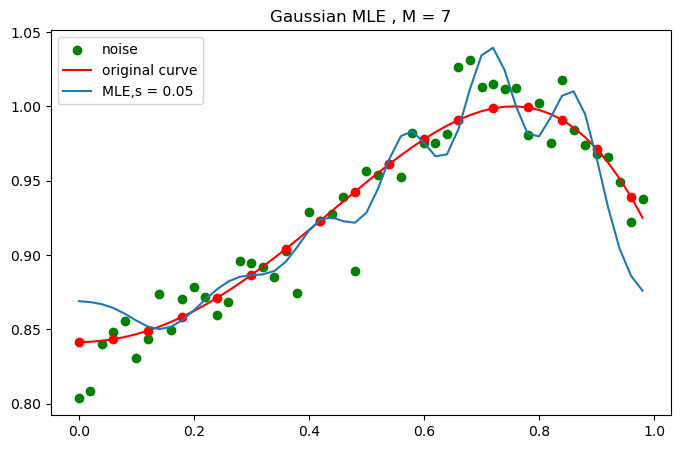

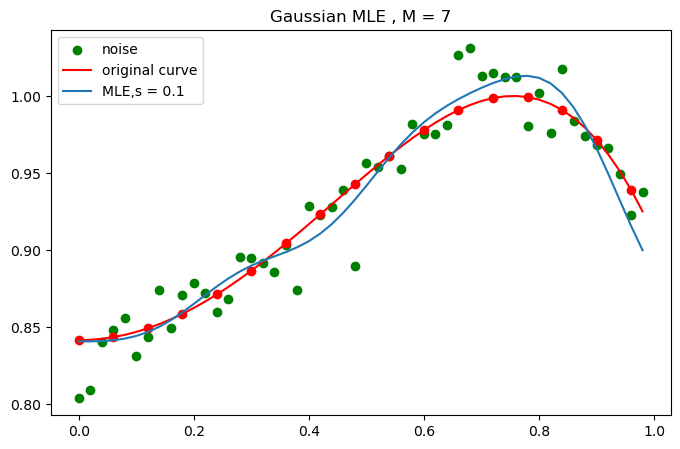

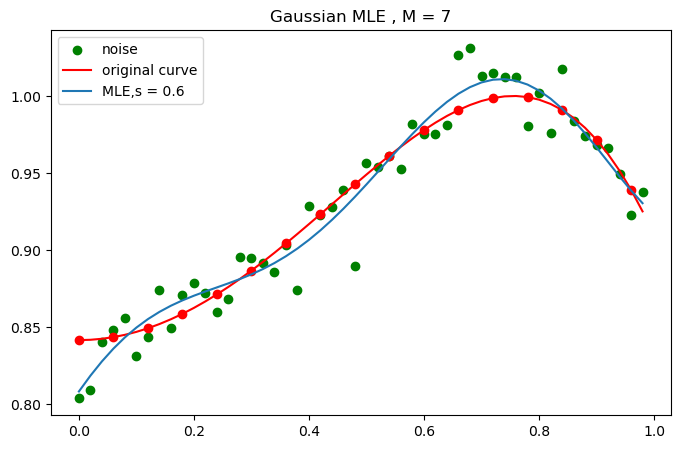

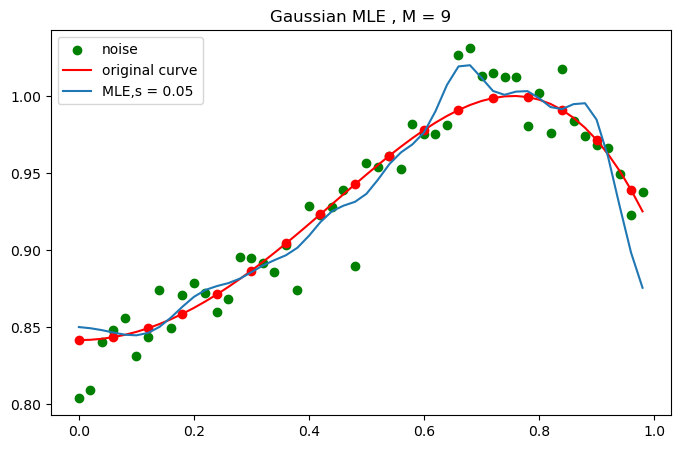

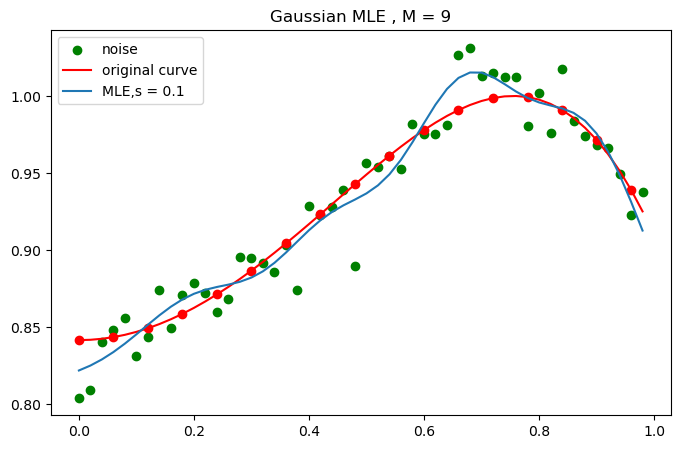

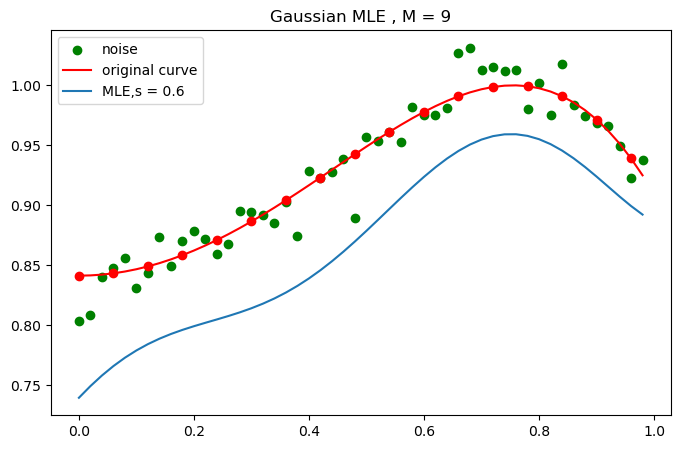

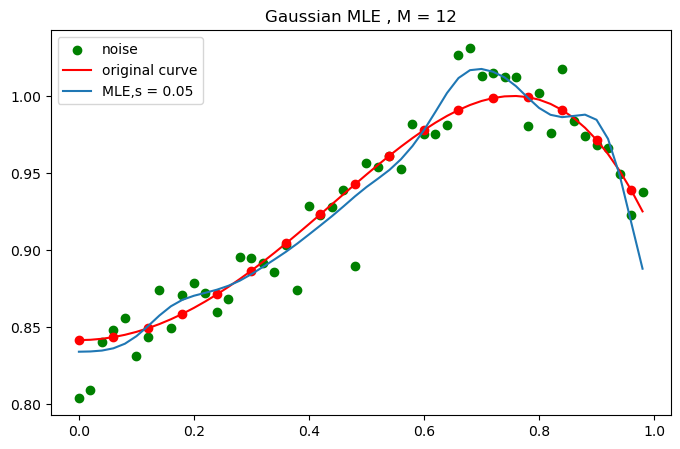

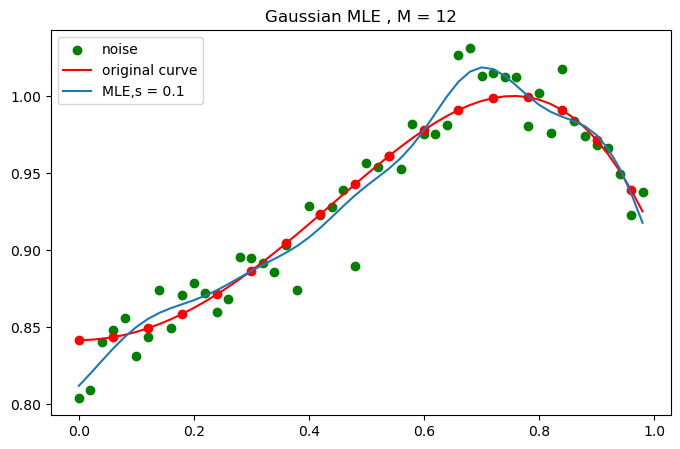

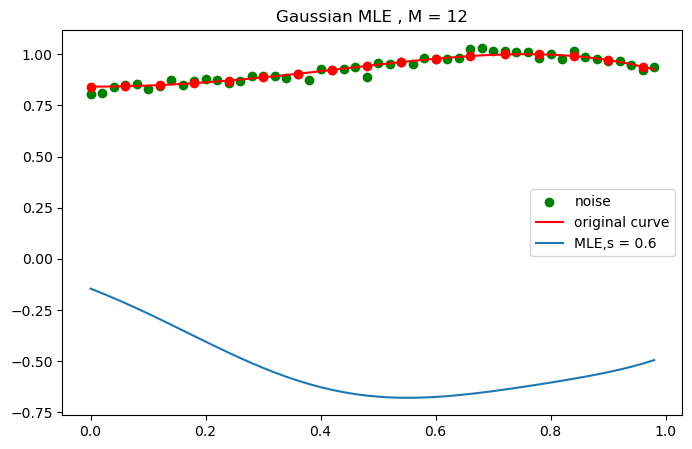

In [70]:
for M in [3,5,7,9,12]:
    for s in [0.05,0.1,0.6]:
        N = len(x)
        um = np.arange(1/M,1,1/M)
        plt.figure(figsize = (8,5))
        plt.plot(x,y,'ro',markevery=3)
        plt.scatter(x,y_noise,color = 'green',label = 'noise')
        plt.plot(x,y,color = 'red',label = 'original curve')
        plt.plot(x,cal_gauMLE(N,M,s,um),label = 'MLE,s = %s'%s)
        #plt.plot(x,calMLE(x,M2),label = 'MLE overfitting, M = 11')
        plt.legend(loc = 'best')
        plt.title('Gaussian MLE , M = %s'%M)

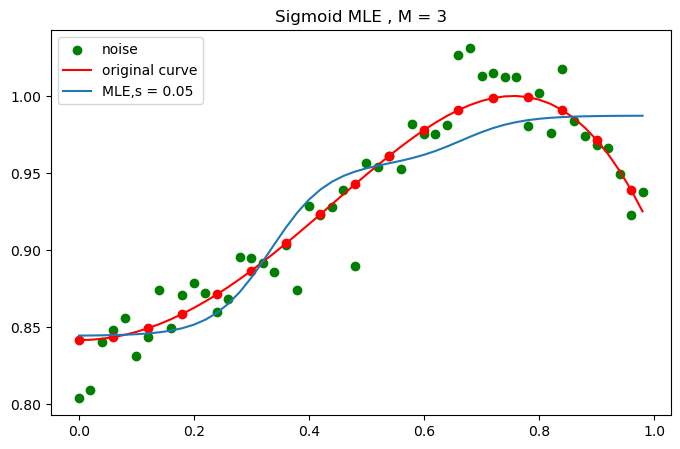

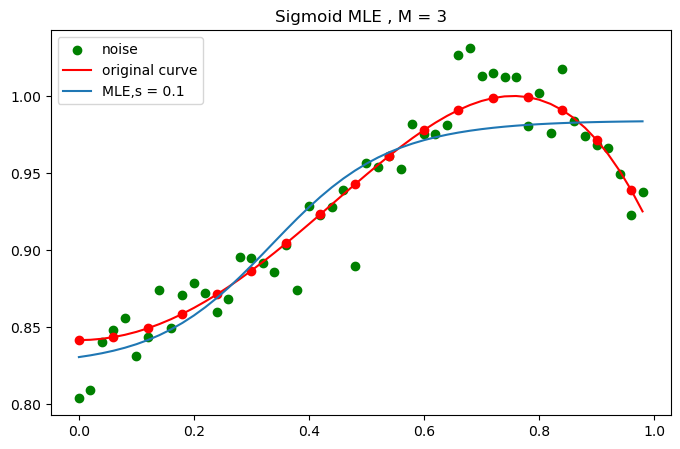

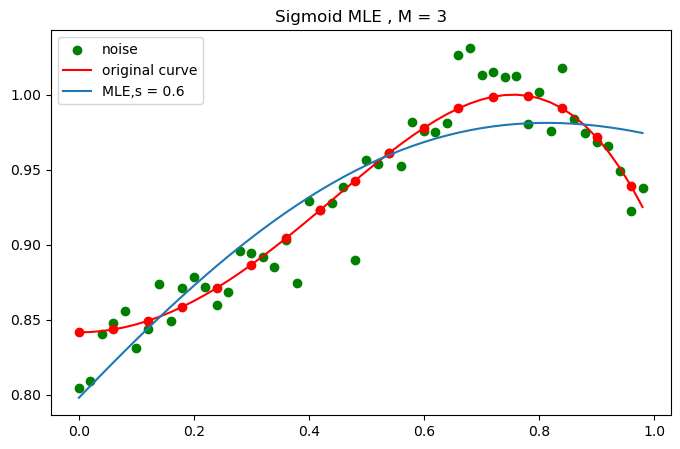

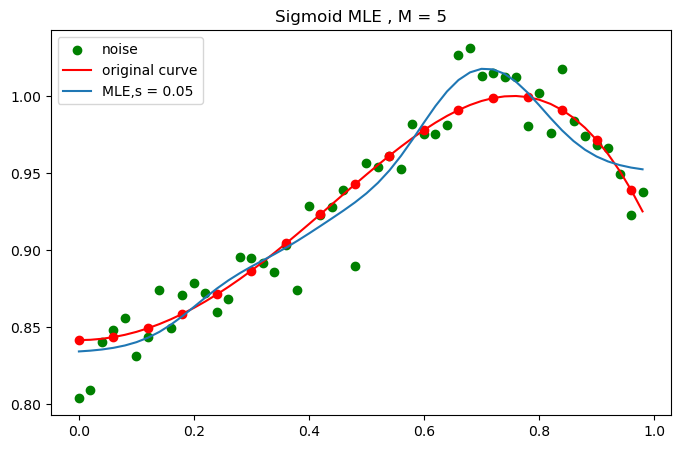

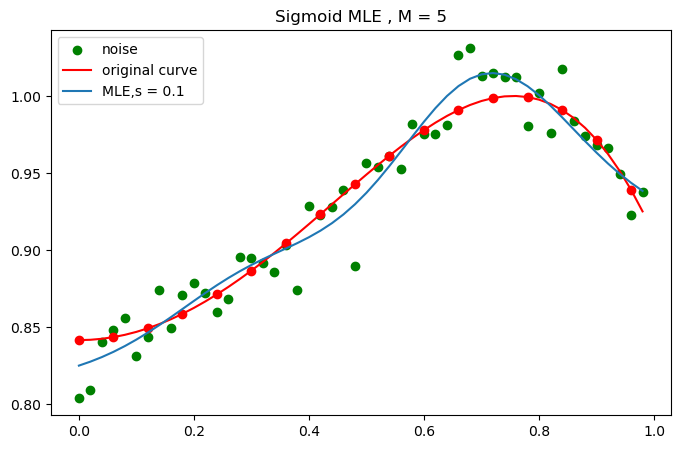

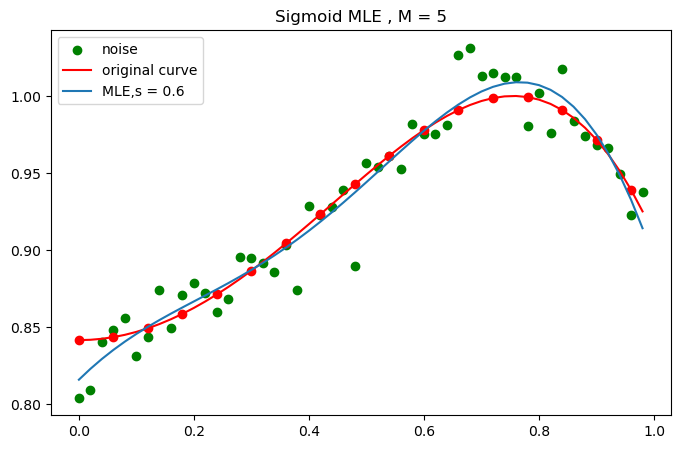

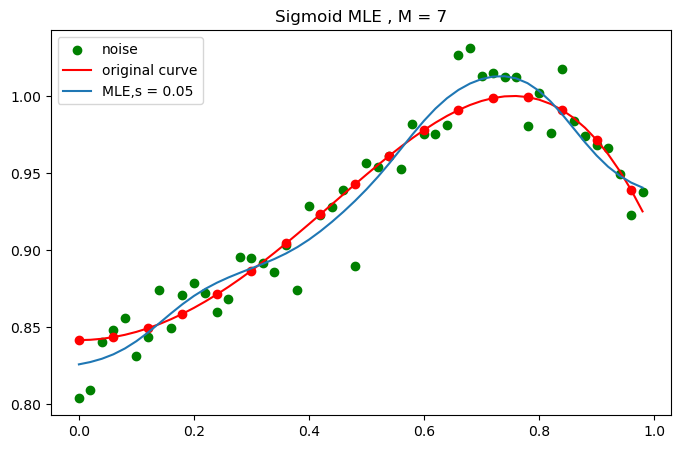

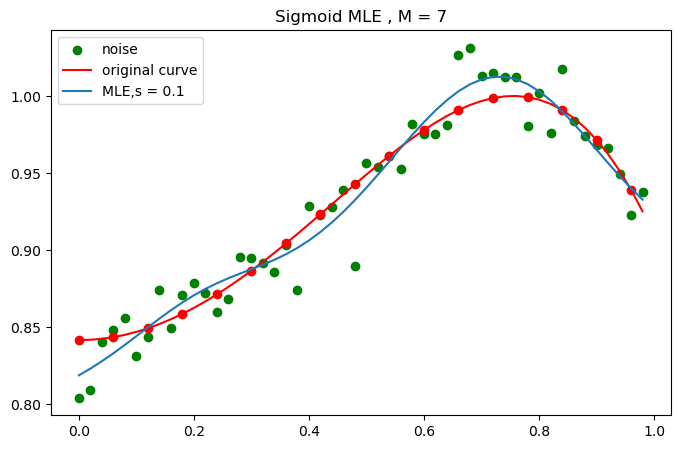

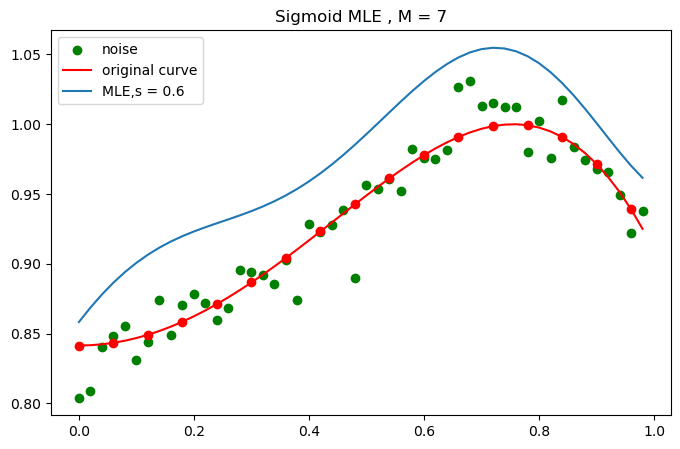

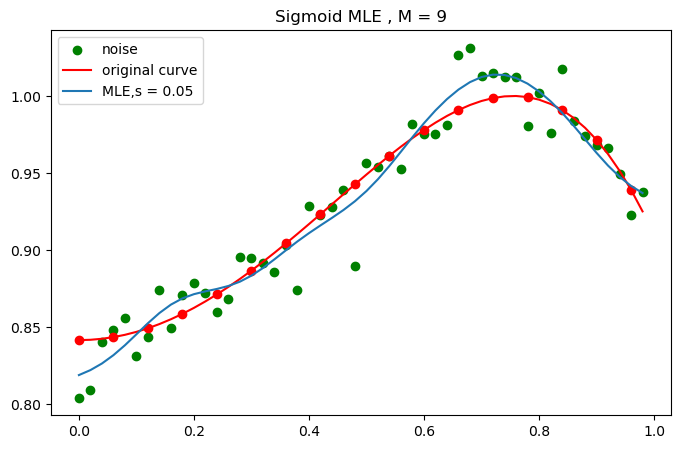

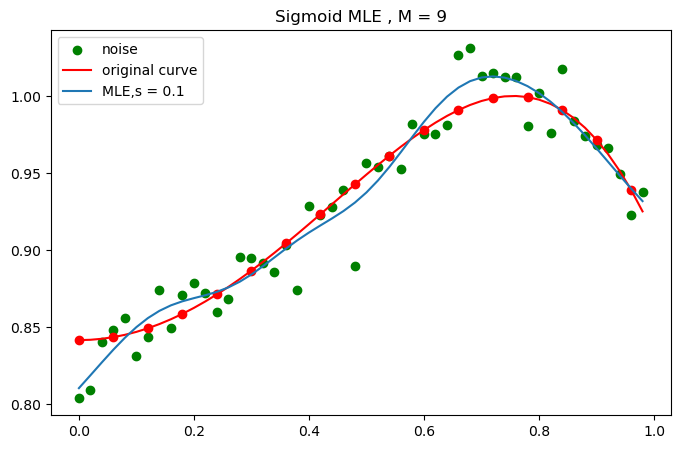

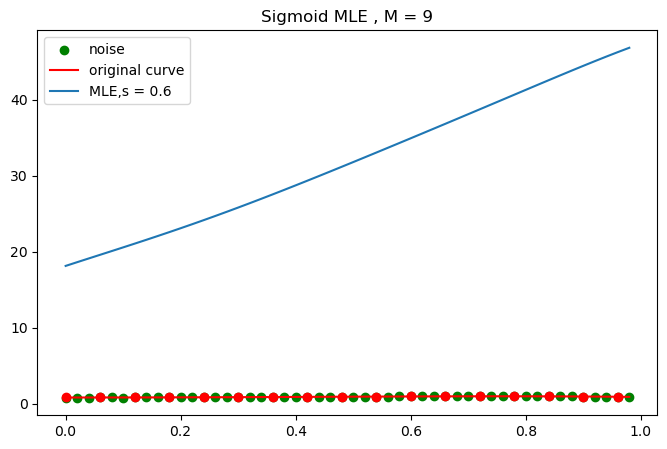

In [73]:
for M in [3,5,7,9]:
    for s in [0.05,0.1,0.6]:
        N = len(x)
        um = np.arange(1/M,1,1/M)
        plt.figure(figsize = (8,5))
        plt.plot(x,y,'ro',markevery=3)
        plt.scatter(x,y_noise,color = 'green',label = 'noise')
        plt.plot(x,y,color = 'red',label = 'original curve')
        plt.plot(x,cal_sigMLE(N,M,s,um,y_noise),label = 'MLE,s = %s'%s)
        #plt.plot(x,calMLE(x,M2),label = 'MLE overfitting, M = 11')
        plt.legend(loc = 'best')
        plt.title('Sigmoid MLE , M = %s'%M)

# Part 3: FULL BAYESIAN + PREDICTIVE DISTRIBUTION

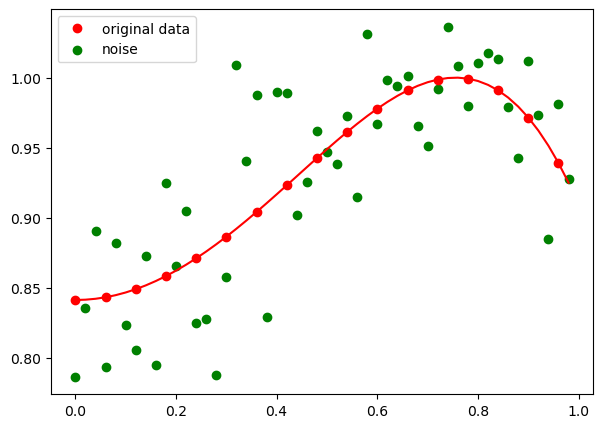

In [97]:
x = np.arange(0,1,0.02)
y = np.sin(x**2 + 1)
sigma = 0.04 #0.02
noise = np.random.normal(0,sigma,len(x))
y_noise = y+noise
plt.figure(figsize = (7,5))
plt.plot(x,y,'or',markevery = 3,label = 'original data')
plt.plot(x,y,'red')
plt.scatter(x,y_noise,color = 'green',label = 'noise')
plt.legend(loc='best')

In [98]:
def cal_fullbay_gau(x,M,alpha,beta,s):
    t_bar = np.zeros((len(x),1))
    FI = np.zeros((len(x),M))
    for i in range (len(x)):
        t_bar[i] = y_noise[i]
    FI = cal_cap_fi(N,M,s,um)
    tmp = linalg.inv((alpha/beta)*np.identity(M)+np.dot(FI.T, FI))
    w_bar = np.dot(np.dot(tmp,FI.T),t_bar)
    #print('w for MAP:\n',w_bar)
    y_fullbay = np.dot(FI,w_bar)    
    return y_fullbay,w_bar

In [99]:
def col_fi(x,u,s,M):
    fik_col = np.exp(-(x-u)**2/2/s**2)
    #print(fik_col)
    return fik_col

def cal_cap_fi(N,M,s,um):
    cap_fi = np.zeros((N,M))
    t_mle = np.zeros((N,1))

    for i in range(M):
        #for j in range (M):
        if i ==0:
            cap_fi[:,i] = 1
        else:
            cap_fi[:,i] = col_fi(x,um[i-1],s,M)
    return cap_fi

w:
 [[ 0.66013667]
 [ 0.48295927]
 [-0.55343171]
 [-0.08014452]
 [ 0.43961077]
 [ 0.19086994]
 [-0.28391277]
 [-0.13357688]
 [ 0.40280116]
 [ 0.05489336]]


Text(0.5, 1.0, 'Full Bayesian, M = 10, alpha = 0.6, beta = 2500')

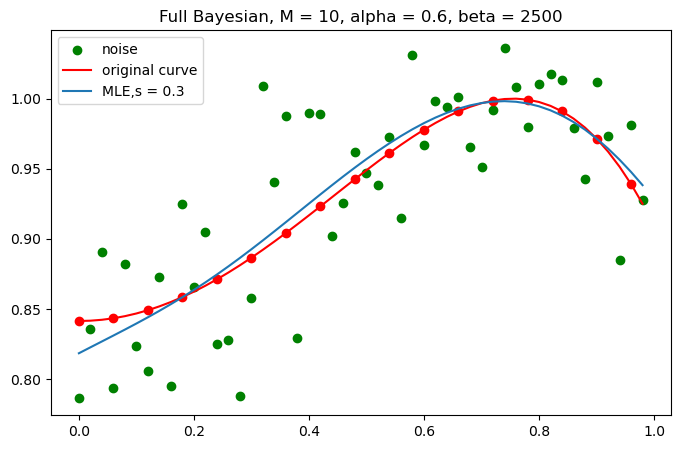

In [100]:
# curve fitting
N = len(x)
M =  10# model complexity
alpha = 0.6
beta= 2500
um = np.arange(1/M,1,1/M)
s = 0.3
y_fullbay_pred,w_bar = cal_fullbay_gau(x,M,alpha,beta,s)

print('w:\n',w_bar)
plt.figure(figsize = (8,5))
plt.plot(x,y,'ro',markevery=3)
plt.scatter(x,y_noise,color = 'green',label = 'noise')
plt.plot(x,y,color = 'red',label = 'original curve')
plt.plot(x,y_fullbay_pred,label = 'MLE,s = %s'%s)
#plt.plot(x,calMLE(x,M2),label = 'MLE overfitting, M = 11')
plt.legend(loc = 'best')
plt.title('Full Bayesian, M = %s, alpha = %s, beta = %s'%(M,alpha,beta))

3. discuss alpha and beta

Discuss the meaning of them with respect to the curve fitting results.

alpha relates to prior of the probability, while beta relates to 

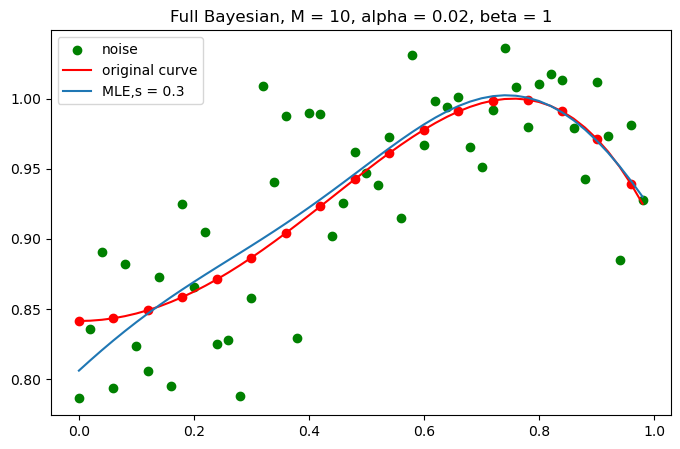

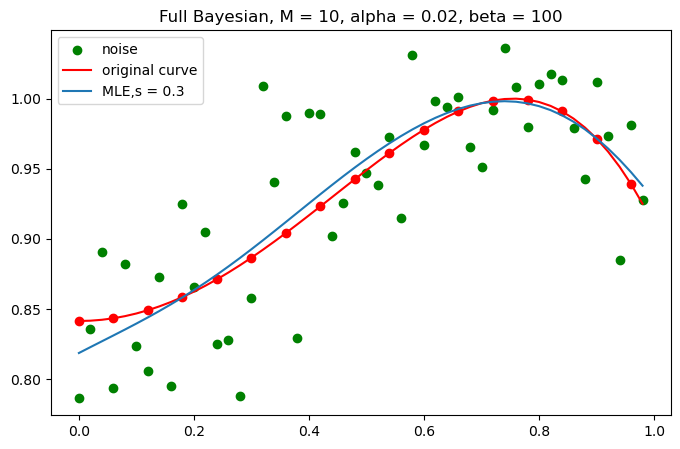

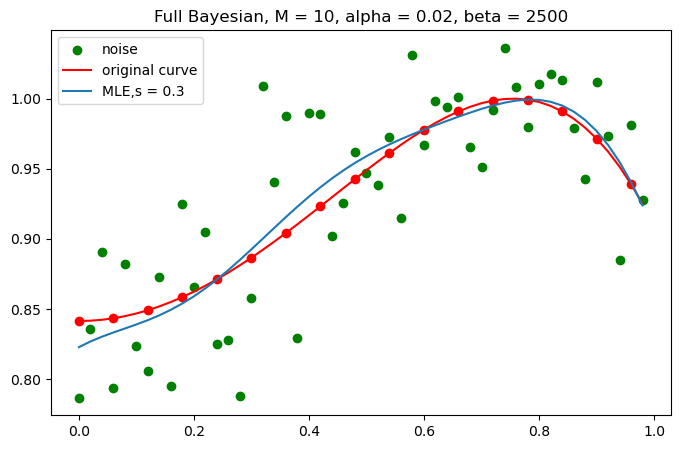

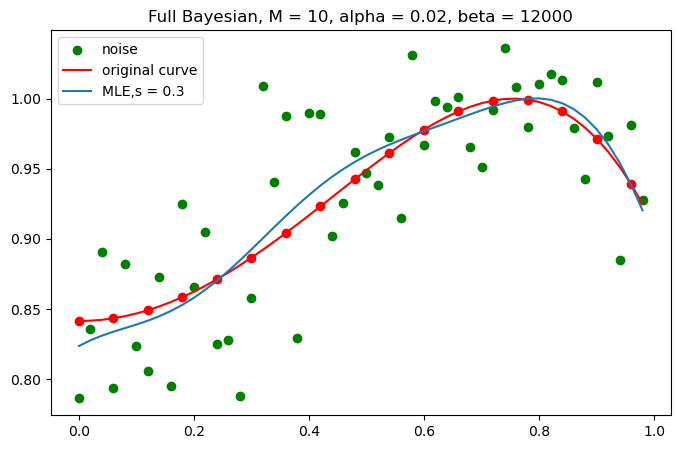

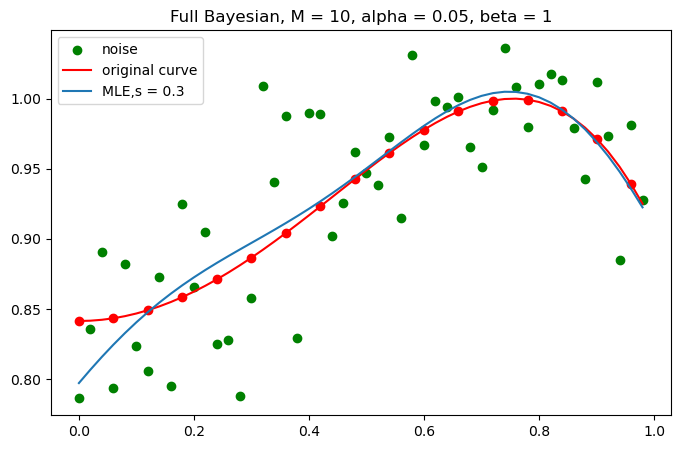

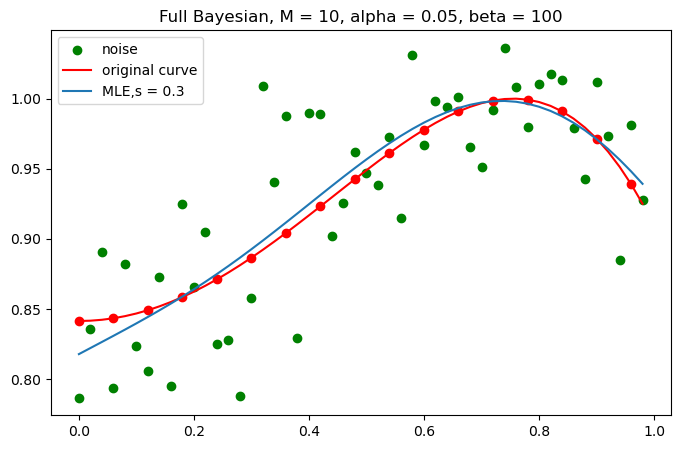

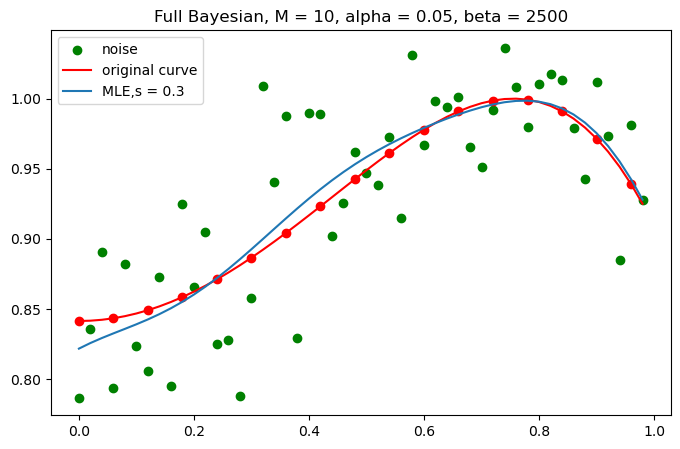

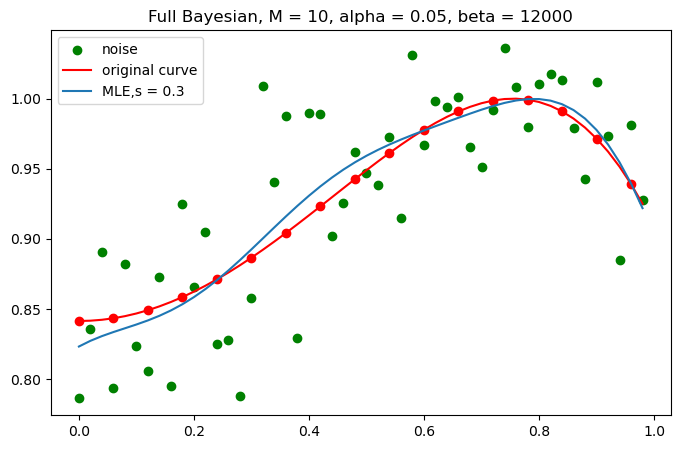

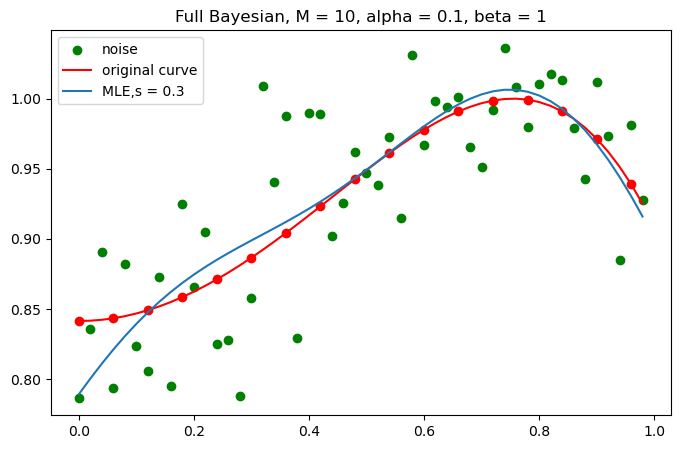

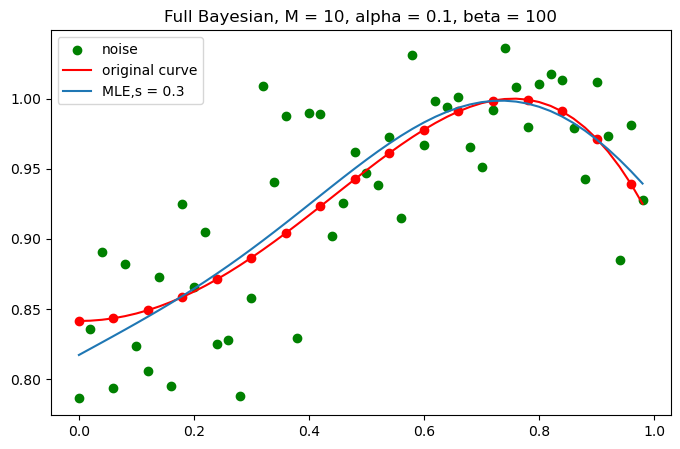

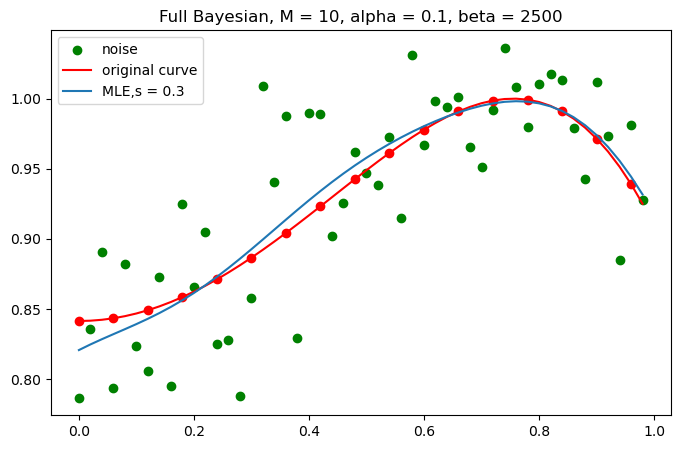

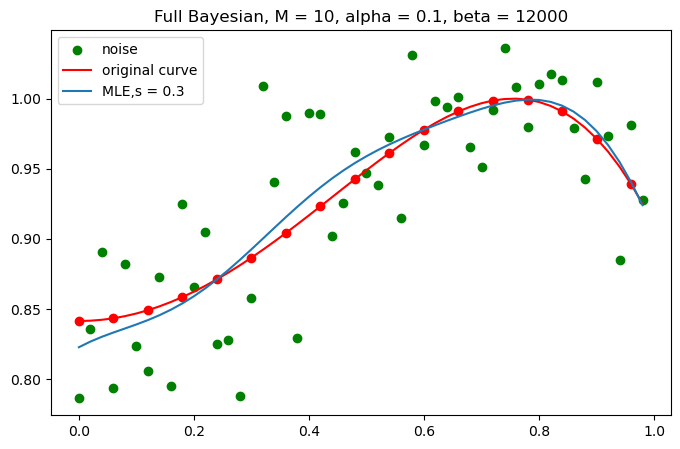

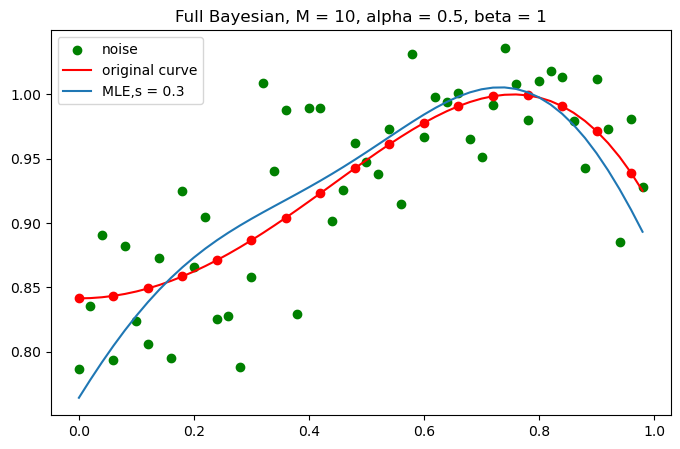

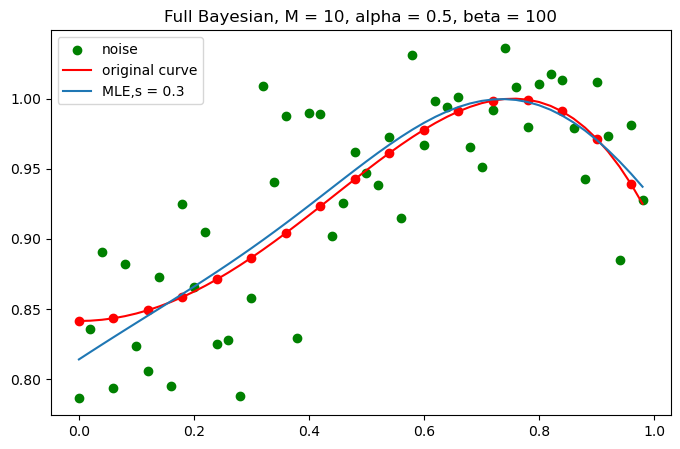

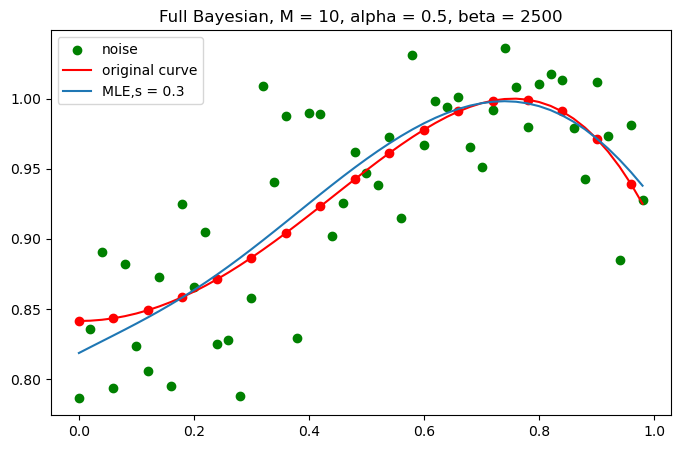

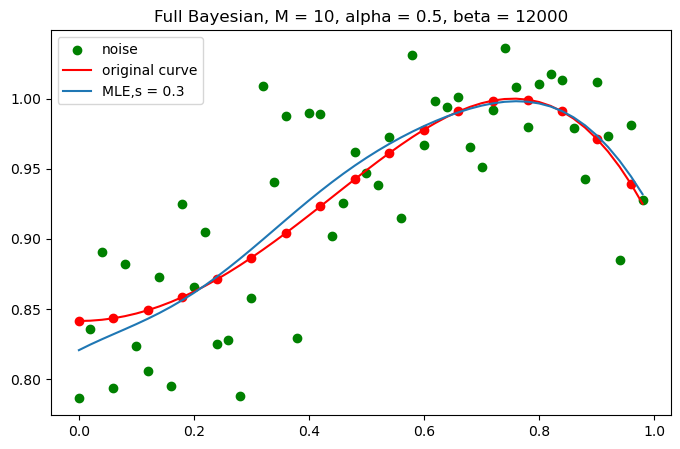

In [101]:
for a in [0.02,0.05,0.1,0.5]:
    for b in [1,100,2500,12000]:
        y_fullbay_pred,w_bar_non = cal_fullbay_gau(x,M,a,b,s)

        plt.figure(figsize = (8,5))
        plt.plot(x,y,'ro',markevery=3)
        plt.scatter(x,y_noise,color = 'green',label = 'noise')
        plt.plot(x,y,color = 'red',label = 'original curve')
        plt.plot(x,y_fullbay_pred,label = 'MLE,s = %s'%s)
        #plt.plot(x,calMLE(x,M2),label = 'MLE overfitting, M = 11')
        plt.legend(loc = 'best')
        plt.title('Full Bayesian, M = %s, alpha = %s, beta = %s'%(M,a,b))

4.Show your best fitting

Text(0.5, 1.0, 'Full Bayesian, M = 12, alpha = 0.07, beta = 25000')

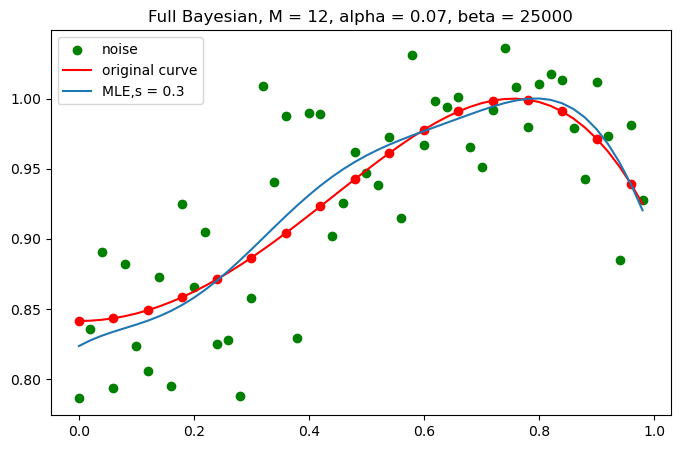

In [108]:
# curve fitting
N = len(x)
M =  12# model complexity
alpha = 0.07
beta= 25000
um = np.arange(1/M,1,1/M)
s = 0.3
y_fullbay_pred,w_bar = cal_fullbay_gau(x,M,alpha,beta,s)

#print('w:\n',w_bar)
plt.figure(figsize = (8,5))
plt.plot(x,y,'ro',markevery=3)
plt.scatter(x,y_noise,color = 'green',label = 'noise')
plt.plot(x,y,color = 'red',label = 'original curve')
plt.plot(x,y_fullbay_pred,label = 'MLE,s = %s'%s)
#plt.plot(x,calMLE(x,M2),label = 'MLE overfitting, M = 11')
plt.legend(loc = 'best')
plt.title('Full Bayesian, M = %s, alpha = %s, beta = %s'%(M,alpha,beta))

5.Explain how useful p(w|t) for the training and testing stages.

p(w|t) is the measurement of the certainty for the prediction under x